In [1]:
#Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter 

import seaborn as sns

from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elroy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
#Read Data
Potential_talent_data = pd.read_csv('potential-talents.csv')

### Let's examine the data

In [61]:
Potential_talent_data

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


The data table shown above has 3 features; job_title, location and connection. Our aim to find out the ranking of candidate 
given a job title. If a candidate is selected, the ranking will change according to the information of the selected candidate 

Although the linkin connection may not be important for the candidate selection, we will still put them to bins and analyze their distribution

In [64]:
Potential_talent_data['connection'] = Potential_talent_data['connection'].apply(lambda x: 501 if x == '500+ ' else int(x))


In [65]:
bins = [0,50,100,150,200,250,300,350,400,450,500,550]
labels = ['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500+']
Potential_talent_data['binned_connection'] = pd.cut(Potential_talent_data['connection'], bins=bins, labels=labels)

In [66]:
Potential_talent_data

,id,job_title,location,connection,fit,binned_connection
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,50-100
1,2,Native English Teacher at EPIK (English Progra...,Kanada,501,NaN,500+
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0-50
3,4,People Development Coordinator at Ryan,"Denton, Texas",501,NaN,500+
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",501,NaN,500+
...,...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN,100-150
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",501,NaN,500+
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN,0-50
102,103,Always set them up for Success,Greater Los Angeles Area,501,NaN,500+


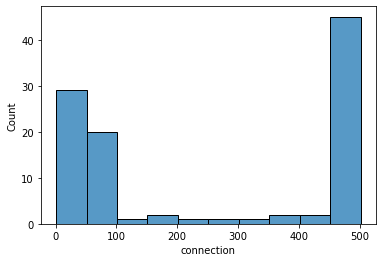

In [67]:
np.histogram(Potential_talent_data['connection'], bins=10)

ax = sns.histplot(data=Potential_talent_data, x="connection", bins=10)

plt.show()

Most candidates have either less than 100 connection or over 450

#### Assume we use 'Aspiring human resources' as our search word

In [69]:
key_word = 'Aspiring human resources'

We will try 5 similarity measure on titles which include 
fuzzy similarity, Euclidean distance, Jaccard Similarity, Cosine similarity and Sentence Transformer for the job similarity

In [71]:
from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [72]:
from fuzzywuzzy import fuzz


In [73]:

def sentence_similarity(title, target_title, model):
        sentences = [title, target_title]

        

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]

In [74]:

def fuzzy_similarity(title, target):
    fuzzy_similarity_score = fuzz.token_set_ratio(title, target)
    
    return fuzzy_similarity_score


sklearn.feature_extraction.text.CountVectorizer

In [76]:

def cosine_similarity_score(title, target):
    
    total_words = [title, target]
    vectorizer = CountVectorizer()

    total_vect = vectorizer.fit_transform(total_words).toarray()
    
    title_vect = vectorizer.transform([title]).toarray()
    target_vect = vectorizer.transform([target]).toarray()
    
    return cosine_similarity(title_vect,target_vect)[0][0]



In [70]:
from sklearn.metrics.pairwise import euclidean_distances

In [77]:

def euclidean_distance_score(title, target):
    
    total_words = [title, target]
    vectorizer = CountVectorizer()

    total_vect = vectorizer.fit_transform(total_words).toarray()
    
    title_vect = vectorizer.transform([title]).toarray()
    target_vect = vectorizer.transform([target]).toarray()
    return euclidean_distances(title_vect, target_vect)[0][0]
    


In [78]:


def Jaccard_Similarity(title, target_title): 
    

    words_doc1 = set( word for word in title.lower().split() if not word in stopwords.words()) 
    words_doc2 = set( word for word in target_title.lower().split() if not word in stopwords.words())  

    intersection = words_doc1.intersection(words_doc2)
    union = words_doc1.union(words_doc2)
        
    return float(len(intersection)) / len(union)



We calculate the similarity score based from the function created and also a Combined similarity score for the combination of those method. We assign weight of 0.7 to fuzzy similarity since it produce the most reliable result on matching the title text. The Euclidean distance is converted to the similar base from 0 to 1 and this makes it comparable to other similarity scores

In [79]:
Potential_talent_data['title_similarity'] = Potential_talent_data['job_title'].apply(lambda x: sentence_similarity(x, key_word, sent_model))
Potential_talent_data['fuzzy_similarity'] = Potential_talent_data['job_title'].apply(lambda x: fuzzy_similarity(x, key_word)/100)
Potential_talent_data['Jaccard_similarity'] = Potential_talent_data['job_title'].apply(lambda x: Jaccard_Similarity(x, key_word))
Potential_talent_data['Cosine_similarity'] = Potential_talent_data['job_title'].apply(lambda x: cosine_similarity_score(x, key_word))
Potential_talent_data['Euclidean_distance'] = Potential_talent_data['job_title'].apply(lambda x: euclidean_distance_score(x, key_word))
Potential_talent_data['Euclidean_distance_scaled'] = Potential_talent_data['Euclidean_distance'].apply(lambda x: 1-(x-Potential_talent_data['Euclidean_distance'].min())/(Potential_talent_data['Euclidean_distance'].max()-Potential_talent_data['Euclidean_distance'].min()))
Potential_talent_data['Combined_similarity_metric']= 0.7 * Potential_talent_data['fuzzy_similarity'] + 0.1 * Potential_talent_data['Cosine_similarity'] + 0.1 * Potential_talent_data['Euclidean_distance_scaled'] + 0.1 * Potential_talent_data['Jaccard_similarity']

## Potential talents with similarity score to the target title

In [80]:
Potential_talent_data

,id,job_title,location,connection,fit,binned_connection,title_similarity,fuzzy_similarity,Jaccard_similarity,Cosine_similarity,Euclidean_distance,Euclidean_distance_scaled,Combined_similarity_metric
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,50-100,0.573268,1.00,0.25,0.462910,3.316625,0.310302,0.802321
1,2,Native English Teacher at EPIK (English Progra...,Kanada,501,NaN,500+,0.239483,0.25,0.00,0.000000,3.741657,0.183763,0.193376
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0-50,0.949807,1.00,0.75,0.866025,1.000000,1.000000,0.961603
3,4,People Development Coordinator at Ryan,"Denton, Texas",501,NaN,500+,0.380222,0.26,0.00,0.000000,2.828427,0.455647,0.227565
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",501,NaN,500+,0.230512,0.23,0.00,0.000000,3.162278,0.356254,0.196625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN,100-150,0.760215,1.00,0.25,0.629941,3.741657,0.183763,0.806370
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",501,NaN,500+,0.603002,0.77,0.40,0.516398,2.000000,0.702283,0.700868
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN,0-50,0.086457,0.22,0.00,0.000000,3.000000,0.404567,0.194457
102,103,Always set them up for Success,Greater Los Angeles Area,501,NaN,500+,0.148272,0.30,0.00,0.000000,3.000000,0.404567,0.250457


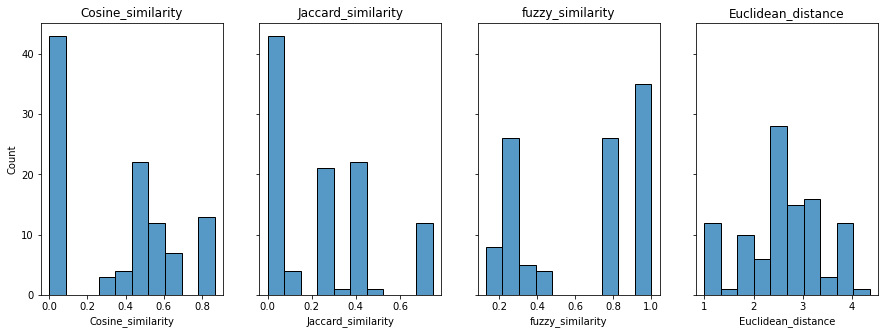

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

sns.histplot(ax=axes[0], data=Potential_talent_data, x="Cosine_similarity", bins=10)
axes[0].set_title('Cosine_similarity')

sns.histplot(ax=axes[1], data=Potential_talent_data, x="Jaccard_similarity", bins=10)
axes[1].set_title('Jaccard_similarity')

sns.histplot(ax=axes[2], data=Potential_talent_data, x="fuzzy_similarity", bins=10)
axes[2].set_title('fuzzy_similarity')

sns.histplot(ax=axes[3], data=Potential_talent_data, x="Euclidean_distance", bins=10)
axes[3].set_title('Euclidean_distance')




plt.show()

From the distribution of the similarity measure, we can see that Euclidean distance provide less clear information.
Jaccard similarity and Cosine similarity provide the alike information on the text similarity

In [82]:
def pareto_plot(df, x):
        hist, bin_edges = np.histogram(df[x], bins=10)
        bin_edges = [ '%.2f' %i for i in bin_edges]
        bin_edges = np.delete(bin_edges, 0)
        new_df = pd.DataFrame({'numbers':hist})
        bin_edges = [str(i) for i in bin_edges]
        new_df.index = bin_edges
        new_df = new_df.sort_values(by='numbers',ascending=False)
        new_df["cumpercentage"] = new_df["numbers"].cumsum()/new_df["numbers"].sum()*100
        fig, ax = plt.subplots()
        plt.ylabel('Count')
        ax.bar(new_df.index, new_df["numbers"], color="C0")
        plt.xticks(rotation = 90)
        ax2 = ax.twinx()
        ax2.plot(new_df.index, new_df["cumpercentage"], color="C1", marker="D", ms=7)
        ax2.yaxis.set_major_formatter(PercentFormatter())
        
        ax.tick_params(axis="y", colors="C0")
        ax2.tick_params(axis="y", colors="C1")
        ax.set_title(x)
        plt.ylabel('Percent')
        plt.show()

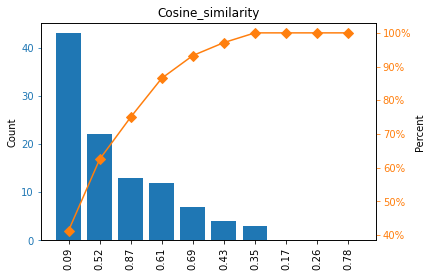

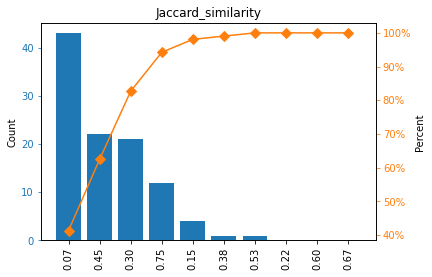

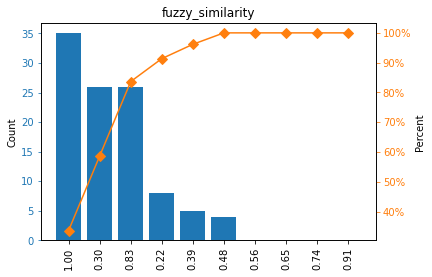

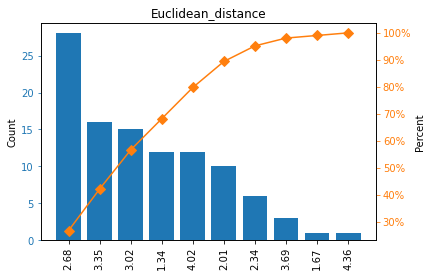

In [83]:
pareto_plot(Potential_talent_data, "Cosine_similarity")
pareto_plot(Potential_talent_data, "Jaccard_similarity")
pareto_plot(Potential_talent_data, "fuzzy_similarity")
pareto_plot(Potential_talent_data, "Euclidean_distance")

In [ ]:
#To determine the threshold of each similarity measure, we create pareto plots for every similarity calculation
#We want to create a short list that include at least the top 20% candidate. Therefore, we need to decide the cut-off point from the pareto plot
#For fuzzy similarity, we choose 80%; For Jaccard similarity, we choose 70%, For Cosine similarity, we choose 60%; For Euclidean distance, we choose 1.5

In [84]:
import geopy

In [85]:


geolocator = Nominatim(user_agent="my_request")
 
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def clean_location_format(location):
    address = location.split(",")[0]
    address = address.replace('Greater', '').replace('Area', '').replace('/',' ')
    location = geolocator.geocode(address)
    return location

Potential_talent_data['clean_location'] = Potential_talent_data['location'].apply(lambda x: clean_location_format(x))


In [ ]:
#We use geopy to clean the location information and use the cleaned information for the distance calculation later

In [86]:
short_list_potential = Potential_talent_data[(Potential_talent_data['fuzzy_similarity'] >80) | 
                                             (Potential_talent_data['Jaccard_similarity'] > 0.7) | 
                                             (Potential_talent_data['Cosine_similarity'] > 0.6) |
                                             (Potential_talent_data['Euclidean_distance'] < 1.5)
                                            ].sort_values(by=['fuzzy_similarity'], ascending = False, ignore_index=True)

In [ ]:
#The short list is created and the candidates are ranked according to their Combined similarity score 

In [87]:
short_list_potential

,id,job_title,location,connection,fit,binned_connection,title_similarity,fuzzy_similarity,Jaccard_similarity,Cosine_similarity,Euclidean_distance,Euclidean_distance_scaled,Combined_similarity_metric,clean_location
0,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0-50,0.949807,1.00,0.750000,0.866025,1.000000,1.000000,0.961603,"(Durham, McAlpin, Raleigh County, West Virgini..."
1,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,1.000000,1.000000,0.961603,"(City of New York, New York, United States, (4..."
2,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,NaN,50-100,0.949807,1.00,0.750000,0.866025,1.000000,1.000000,0.961603,"(Kokomo, Howard County, Indiana, United States..."
3,79,Liberal Arts Major. Aspiring Human Resources A...,"Baton Rouge, Louisiana Area",7,NaN,0-50,0.689971,1.00,0.428571,0.654654,2.000000,0.702283,0.878551,"(Baton Rouge, East Baton Rouge Parish, Louisia..."
4,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,NaN,0-50,0.717391,1.00,0.428571,0.800641,2.449490,0.568463,0.879768,"(Houston, Harris County, Texas, United States,..."
5,72,Business Management Major and Aspiring Human R...,"Monroe, Louisiana Area",5,NaN,0-50,0.724114,1.00,0.428571,0.612372,2.236068,0.632002,0.867295,"(Monroe County, Illinois, United States, (38.2..."
6,66,Experienced Retail Manager and aspiring Human ...,"Austin, Texas Area",57,NaN,50-100,0.696066,1.00,0.428571,0.612372,2.236068,0.632002,0.867295,"(Austin, Travis County, Texas, United States, ..."
7,60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,1.000000,1.000000,0.961603,"(City of New York, New York, United States, (4..."
8,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0-50,0.949807,1.00,0.750000,0.866025,1.000000,1.000000,0.961603,"(Durham, McAlpin, Raleigh County, West Virgini..."
9,49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,1.000000,1.000000,0.961603,"(City of New York, New York, United States, (4..."


Fuzzy similarity shows better matching between the job titles. Jaccard similarity, Cosine similarity and Euclidean distance use the similar logic to compare the titles. However, Jaccard similarity and Euclidean distance are less accurate if the title of the candidate contains information more than required.
Therefore, we use fuzzy similarity as our prioritized criteria for the list update. 

## Re-ranking the shortlist

In [89]:
Selected_candidate_id = 100


In [90]:
def get_candidate(selected_candidate_id = Selected_candidate_id):
    selected_candidate = short_list_potential.loc[short_list_potential['id'] == selected_candidate_id]
    select_lat = selected_candidate['clean_location'].iloc[0].latitude
    select_long = selected_candidate['clean_location'].iloc[0].longitude 
    #print(selected_candidate,selected_candidate, select_lat, select_long)
    return selected_candidate, select_lat, select_long

In [95]:
#Location is conveterd to distance between the location of the selected candidate and the location of each candidate using geopy
def distance_cal(La1, Long1, La2, Long2):
    coordinate1 = (La1, Long1)
    coordinate2 = (La2, Long2)
    distance = GD(coordinate1, coordinate2).km
    return distance

For the update of the shortlist, we will find out how the list match the selected candidate. Therefore, we calculate the similarity score between the selected candidate and the rest.

In [96]:
ranking_order = ['Combined_similarity_metric', 'fuzzy_similarity_selected_loc', 'fuzzy_similarity', 'distance(km)', 'binned_connection']
asc_dict = {'Combined_similarity_metric':False, 'fuzzy_similarity_selected_loc':False, 'fuzzy_similarity':False, 'distance(km)':True, 'binned_connection':False}

In [97]:
def update_potential(short_list_potential, selected_candidate_id , ranking_order, asc_dict):
    selected_candidate, select_lat, select_long = get_candidate(selected_candidate_id = Selected_candidate_id)
    new_short_list_potential = short_list_potential
    new_short_list_potential.fit[short_list_potential['id'] == selected_candidate_id] = True
    new_short_list_potential.fit[short_list_potential['id'] != selected_candidate_id] = float('NaN')
    new_short_list_potential['job_title & location'] = new_short_list_potential['job_title'] + new_short_list_potential['location']
    new_short_list_potential['fuzzy_similarity_selected_loc'] = new_short_list_potential['job_title & location'].apply(lambda x: fuzzy_similarity(x, selected_candidate.iloc[0]['job_title & location']))
    new_short_list_potential['cosine_similarity_selected_loc'] = new_short_list_potential['job_title & location'].apply(lambda x: cosine_similarity_score(x, selected_candidate.iloc[0]['job_title & location']))
    new_short_list_potential['euclidean_similarity_selected_loc'] = new_short_list_potential['job_title & location'].apply(lambda x: euclidean_distance_score(x, selected_candidate.iloc[0]['job_title & location']))
    new_short_list_potential['euclidean_similarity_selected_loc_scaled'] = new_short_list_potential['euclidean_similarity_selected_loc'].apply(lambda x: 1-(x-new_short_list_potential['euclidean_similarity_selected_loc'].min())/(new_short_list_potential['euclidean_similarity_selected_loc'].max()-new_short_list_potential['euclidean_similarity_selected_loc'].min()))
    new_short_list_potential['fuzzy_similarity_selected'] = new_short_list_potential['job_title'].apply(lambda x: fuzzy_similarity(x, selected_candidate.iloc[0]['job_title']))
    new_short_list_potential['Combined_similarity_metric']= 0.8 * new_short_list_potential['fuzzy_similarity_selected']/100 + 0.1 * new_short_list_potential['cosine_similarity_selected_loc'] + 0.1 * new_short_list_potential['euclidean_similarity_selected_loc_scaled'] 
    #Choose what features is more important in ranking

    ascending = [asc_dict[rank] for rank in ranking_order]
    new_short_list_potential['distance(km)'] = new_short_list_potential['clean_location'].apply(lambda x: distance_cal(select_lat, select_long, x.latitude, x.longitude))
    new_short_list_potential = new_short_list_potential.sort_values(by=ranking_order, ascending = ascending, ignore_index=True)
    print(new_short_list_potential)
    return new_short_list_potential, selected_candidate

In [98]:
new_short_list_potential_ranked, selected_candidate = update_potential(short_list_potential, selected_candidate_id = Selected_candidate_id, ranking_order = ranking_order, asc_dict = asc_dict)

     id                                          job_title  \
0   100  Aspiring Human Resources Manager | Graduating ...   
1    73  Aspiring Human Resources Manager, seeking inte...   
2     6                Aspiring Human Resources Specialist   
3    60                Aspiring Human Resources Specialist   
4    49                Aspiring Human Resources Specialist   
5    36                Aspiring Human Resources Specialist   
6    24                Aspiring Human Resources Specialist   
7    97              Aspiring Human Resources Professional   
8     3              Aspiring Human Resources Professional   
9    58              Aspiring Human Resources Professional   
10   46              Aspiring Human Resources Professional   
11   33              Aspiring Human Resources Professional   
12   21              Aspiring Human Resources Professional   
13   17              Aspiring Human Resources Professional   
14   29  Aspiring Human Resources Management student se...   
15   27 

<ipython-input-97-7058229af8ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_short_list_potential.fit[short_list_potential['id'] == selected_candidate_id] = True
<ipython-input-97-7058229af8ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_short_list_potential.fit[short_list_potential['id'] != selected_candidate_id] = float('NaN')


In [99]:
selected_candidate

,id,job_title,location,connection,fit,binned_connection,title_similarity,fuzzy_similarity,Jaccard_similarity,Cosine_similarity,Euclidean_distance,Euclidean_distance_scaled,Combined_similarity_metric,clean_location,job_title & location
18,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,True,100-150,0.760215,1.0,0.25,0.629941,3.741657,0.183763,0.80637,"(Cape Girardeau, Cape Girardeau County, Missou...",Aspiring Human Resources Manager | Graduating ...


In [100]:
new_short_list_potential_ranked

,id,job_title,location,connection,fit,binned_connection,title_similarity,fuzzy_similarity,Jaccard_similarity,Cosine_similarity,...,Euclidean_distance_scaled,Combined_similarity_metric,clean_location,job_title & location,fuzzy_similarity_selected_loc,cosine_similarity_selected_loc,euclidean_similarity_selected_loc,euclidean_similarity_selected_loc_scaled,fuzzy_similarity_selected,distance(km)
0,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,True,100-150,0.760215,1.00,0.250000,0.629941,...,0.183763,1.000000,"(Cape Girardeau, Cape Girardeau County, Missou...",Aspiring Human Resources Manager | Graduating ...,100,1.000000,0.000000,1.000000,100,0.000000
1,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,NaN,0-50,0.717391,1.00,0.428571,0.800641,...,0.568463,0.795497,"(Houston, Harris County, Texas, United States,...","Aspiring Human Resources Manager, seeking inte...",74,0.625543,3.872983,0.209431,89,996.953535
2,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,...,1.000000,0.691319,"(City of New York, New York, United States, (4...",Aspiring Human Resources SpecialistGreater New...,56,0.368605,4.582576,0.064586,81,1394.162427
3,60,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,...,1.000000,0.691319,"(City of New York, New York, United States, (4...",Aspiring Human Resources SpecialistGreater New...,56,0.368605,4.582576,0.064586,81,1394.162427
4,49,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,...,1.000000,0.691319,"(City of New York, New York, United States, (4...",Aspiring Human Resources SpecialistGreater New...,56,0.368605,4.582576,0.064586,81,1394.162427
5,36,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,...,1.000000,0.691319,"(City of New York, New York, United States, (4...",Aspiring Human Resources SpecialistGreater New...,56,0.368605,4.582576,0.064586,81,1394.162427
6,24,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN,0-50,0.928035,1.00,0.750000,0.866025,...,1.000000,0.691319,"(City of New York, New York, United States, (4...",Aspiring Human Resources SpecialistGreater New...,56,0.368605,4.582576,0.064586,81,1394.162427
7,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,NaN,50-100,0.949807,1.00,0.750000,0.866025,...,1.000000,0.685587,"(Kokomo, Howard County, Indiana, United States...","Aspiring Human Resources ProfessionalKokomo, I...",60,0.425628,4.358899,0.110243,79,459.612410
8,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0-50,0.949807,1.00,0.750000,0.866025,...,1.000000,0.675319,"(Durham, McAlpin, Raleigh County, West Virgini...",Aspiring Human Resources ProfessionalRaleigh-D...,51,0.368605,4.582576,0.064586,79,729.835543
9,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0-50,0.949807,1.00,0.750000,0.866025,...,1.000000,0.675319,"(Durham, McAlpin, Raleigh County, West Virgini...",Aspiring Human Resources ProfessionalRaleigh-D...,51,0.368605,4.582576,0.064586,79,729.835543


## Conclusion

Since there is lack of additional information on the skill sets of the candidate. The best matching method would be focusing on the geographical distance and the exact match of title name. As we can see in the above table, the candidate list is updated based on the ranking of combined similarity score to the selected candidate. Both cosine similarity and euclidean distance produce consistent results to fuzzy similarity. 